## Homework 3 

Questions:
Illustrate the "bias-variance tradeoff" or "bias-variance dilemma", an important concept in statistics which concerns the tradeoff between bias (i.e. in-sample error) and variance (i.e. the change in estimate between training and validation sets) as statistical model complexity is varied. The bias-variance tradeoff consists in the need to minimize these two sources of error, the variance and bias of an estimator, in order to minimize the mean squared error. Sometimes there is a tradeoff between minimizing bias and minimizing variance to achieve the least possible MSE. The bias-variance tradeoff explains why complex models tend to over-fit the training data and overly simple models may underfit the training data.

Write a code where each input x denotes an angle in radians and the output is a noisy trigonometric function 1−cos(x) + x + eps, where eps is Gaussian noise. The regression model is of the form y=b_0 + b_1 x + … + b_n xn. Use 200 training samples for training and 80 samples for out-of-sample testing. Plot the generated datasets.

Add a column to the training and validation datasets containing each of the monomials up to the 39th power
Take the training and validation sets (as `data1` and `data2` respectively), and using the powers of the inputs x calculated above, fit a polynomial of degree `power` to the training data. If `power` is a key of the `models_to_plot` dictionary, the model of that degree is plotted against the training and testing data.

Calculate the coefficients of the resulting polynomial for degrees of up to 39, and plot those specified in `models_to_plot`
Illustrate the bias-variance tradeoff. Show the in-sample MSE and out-of-sample MSE for each of the models (ordered by complexity). The in-sample MSE (bias) is observed to decrease/increase(?) with complexity. For less complex models, the in-sample MSE is observed to be higher/lower(?) than the out-of-sample MSE, indicating that the model is underfitting/overfitting(?). For the most complex models, is the out-of-sample error significantly larger than the in-sample error (variance) or not?

***
Solution:

(personal understanding notes)
# The Bias-Variance Tradeoff

> Imagine you're an archer, and your goal is to hit the bullseye. The bullseye represents the true, perfect pattern in a dataset that a machine learning model aims to identify.



Bias: The Accuracy Problem

**Bias** refers to a model's tendency to consistently learn the wrong thing by being overly simplistic. It's about **accuracy**. Are your shots centered around the bullseye?

* **High Bias**: You're not very accurate. You consistently miss the bullseye in the same direction (e.g., always high and to the left). A model with high bias is too simple and fails to capture the underlying pattern in the data. This is called **underfitting**.
* **Low Bias**: Your shots are centered correctly around the bullseye. Your model is accurate.



Variance: The Consistency Problem

**Variance** refers to a model's sensitivity to small fluctuations in the training data. It's about **consistency**. Are your shots tightly packed together?

* **High Variance**: You're not consistent. Your shots are scattered all over the target. A model with high variance is too complex; it pays too much attention to random noise and essentially "memorizes" the training data. It performs poorly on new, unseen data. This is called **overfitting**.
* **Low Variance**: Your shots are all clustered tightly together. Your model is very consistent.



The Tradeoff Dilemma

The ultimate goal is to achieve both **low bias** and **low variance**—all arrows clustered in the center of the bullseye. However, these two errors are often in opposition.

* A **very simple model** is like an archer who ignores the wind and always aims for the same spot. It's consistent (**low variance**), but if that spot isn't the bullseye, it will always be wrong (**high bias**). It **underfits**.

* A **very complex model** is like an archer who tries to adjust for every tiny puff of wind. They might hit the bullseye perfectly on one shot, but the next will be completely different because the conditions changed. It has low bias on the data it saw, but its predictions will be all over the place for new data (**high variance**). It **overfits**.

> Our goal is to find the **"Goldilocks" model**—not too simple, not too complex—that has the best possible combination of bias and variance to minimize the total error.

---
## 1. Creating the Data

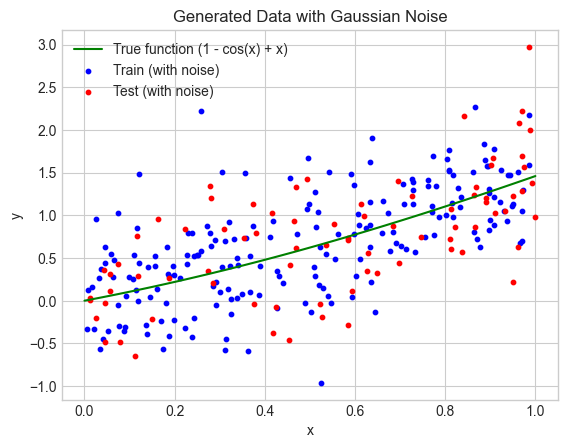

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings('ignore')  # to ignore polyfit warnings

np.random.seed(42)

# Part 1: Creating the data
# Generate data with Gaussian noise: y = 1 - cos(x) + x + eps, where eps ~ Gaussian(0, 0.5)
x_train = np.sort(np.random.uniform(0, 1, 200))
true_train = 1 - np.cos(x_train) + x_train  # True function: 1 - cos(x) + x
y_train = true_train + np.random.normal(0, 0.5, 200)  # Add Gaussian noise eps
x_test = np.sort(np.random.uniform(0, 1, 80))
true_test = 1 - np.cos(x_test) + x_test  # True function: 1 - cos(x) + x
y_test = true_test + np.random.normal(0, 0.5, 80)  # Add Gaussian noise eps

# True function for plotting (without noise)
true_x = np.linspace(0, 1, 100)
true_y = 1 - np.cos(true_x) + true_x

# Create data dictionaries
data1 = {'x': x_train, 'y': y_train}
data2 = {'x': x_test, 'y': y_test}

# Add monomials up to 39th power
for i in range(40):
    data1[f'x^{i}'] = data1['x'] ** i
    data2[f'x^{i}'] = data2['x'] ** i

# Graph 1: plot data
plt.figure(1)
plt.plot(true_x, true_y, 'g-', label='True function (1 - cos(x) + x)')
plt.scatter(data1['x'], data1['y'], color='b', s=10, label='Train (with noise)')
plt.scatter(data2['x'], data2['y'], color='r', s=10, label='Test (with noise)')
plt.legend()
plt.title('Generated Data with Gaussian Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We have created a known pattern and added some random "noise" to it. One set for training our archer (the analogy to better understand the problem and difference in bias and variance, pls ignore for grading if confusing) and another set for testing how well they do on new targets they haven't seen before.

This code gives us two sets of dots: a blue set for training our models and a red set for testing them. Plotted it just to see the data we have generated. I have also plotted the true function to later compare with higher and lower degree polynomials.

Data generated assumptions:
200 - training 
80 - testing
function used - 1 - np.cos(x) + x
noise - gaussian or normal

Why we do it: This combines the perfect pattern with random error to create the final y-coordinates for our training data. The result is a set of points that clearly follow a curve but are scattered around it, just like real data.

---
# 2. Fitting Models and Seeing How they do

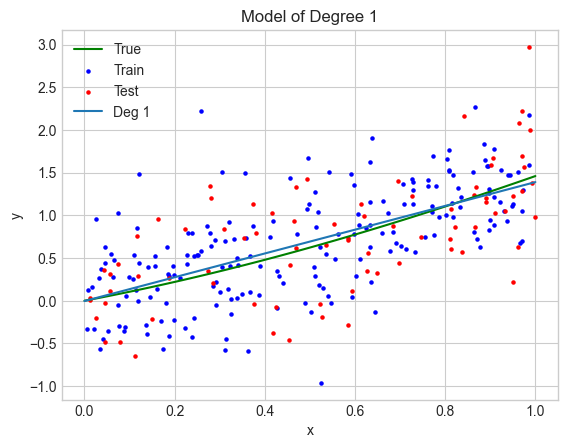

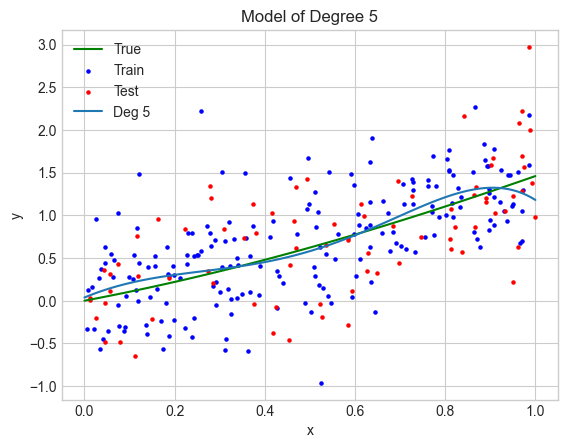

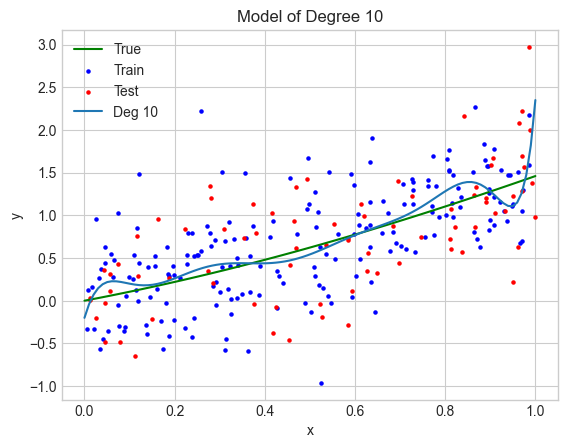

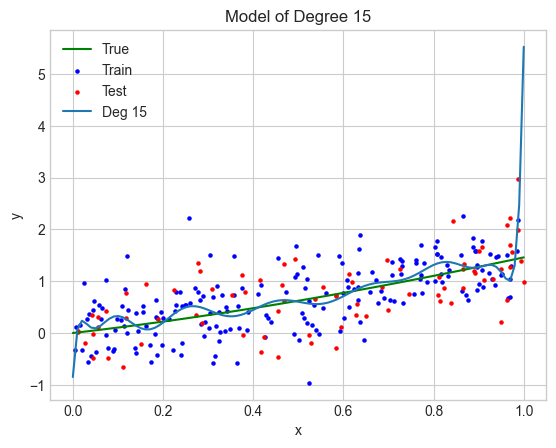

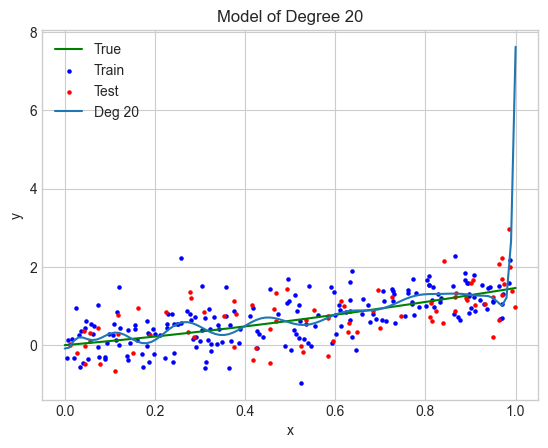

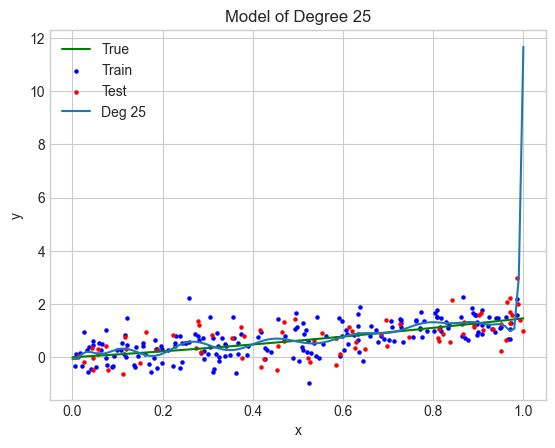

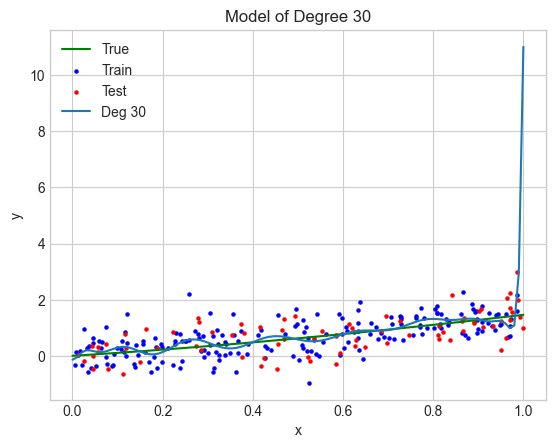

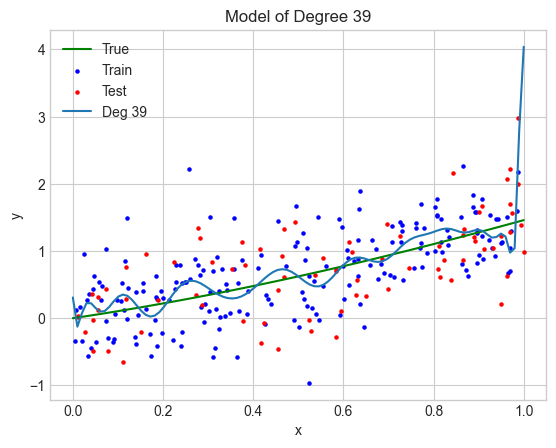

In [224]:
# Part 2: Fitting models and seeing how they do
# Create dictionary to store fitted models for degrees 0 to 39
models_to_plot = {}
max_deg = 39
for deg in range(max_deg + 1):
    poly_model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    poly_model.fit(data1['x'].reshape(-1, 1), data1['y'])
    models_to_plot[deg] = poly_model

# Function to plot a model for a given degree
def plot_model(power):
    plt.figure()
    plt.plot(true_x, true_y, 'g-', label='True')
    plt.scatter(data1['x'], data1['y'], color='b', s=5, label='Train')
    plt.scatter(data2['x'], data2['y'], color='r', s=5, label='Test')
    model = models_to_plot[power]
    pred_y = model.predict(true_x.reshape(-1, 1))
    plt.plot(true_x, pred_y, label=f'Deg {power}')
    plt.legend()
    plt.title(f'Model of Degree {power}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Plot models for specified degrees
degrees_to_plot = [1, 5, 10, 15, 20, 25, 30, 39] # these were chosen randomly just for me to see the plots and effects of lower and higher degree polynomials
for power in degrees_to_plot:
    plot_model(power)

# Compute bias^2, variance, and MSE using multiple replications
num_reps = 20
bias_sq = []
variance = []
train_mse = []
test_mse = []
degs = list(range(max_deg + 1))

for deg in degs:
    preds_train = np.zeros((num_reps, len(x_train)))
    train_mse_rep = []
    test_mse_rep = []
    for rep in range(num_reps):
        y_train_rep = true_train + np.random.normal(0, 0.5, len(x_train))  # Add Gaussian noise eps
        poly_model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
        poly_model.fit(data1['x'].reshape(-1, 1), y_train_rep)
        y_pred_train = poly_model.predict(data1['x'].reshape(-1, 1))
        preds_train[rep, :] = y_pred_train
        mse_train = np.mean((y_pred_train - y_train_rep)**2)
        train_mse_rep.append(mse_train)
        y_pred_test = poly_model.predict(data2['x'].reshape(-1, 1))
        mse_test = np.mean((y_pred_test - data2['y'])**2)
        test_mse_rep.append(mse_test)
    # Bias^2 = (E[f_hat] - f)^2
    bias_sq.append(np.mean((np.mean(preds_train, axis=0) - true_train)**2))
    # Variance = E[(f_hat - E[f_hat])^2]
    variance.append(np.mean(np.var(preds_train, axis=0)))
    train_mse.append(np.mean(train_mse_rep))
    test_mse.append(np.mean(test_mse_rep))


The above graphs were plotted just for personal understanding.
degrees_to_plot = [1, 5, 10, 15, 20, 25, 30, 39] -> these were chosen randomly just for me to see the plots and effects of lower and higher degree polynomials. More explanation about what's happening in the code above: 

In this code first we train our models and store this in a dictionary. 
The key = power of the polynomial 
for example:
y = mx + b
for power = 4
y = a0 + a1x + a2x^2 + a3x^3 + a4x^4

The value = model/ coefficients we get after training

Then we use this dictionary for our function, which takes the power and generates the graph for it. One improvement i can make here, if someone wishes to see a random polynomial let's say 140 and if it is not in the dictionary then the function would train a new model and add it to the dictionary and give the user output as well for better analysis. 
We can also see here, as the degree of the polynomial increases the model becomes more curvy and wavy trying to fit the data more closely, perhaps overfitting. 
We are also calulating the bias, variance, MSE here.

For more analysis the user can simply call it by plot_model(34 or any number of their choice between 1 - 40)

---
# Step 3: Illustrating the Analysis

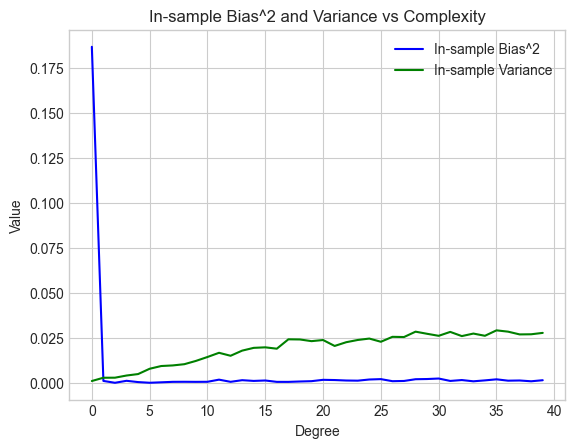

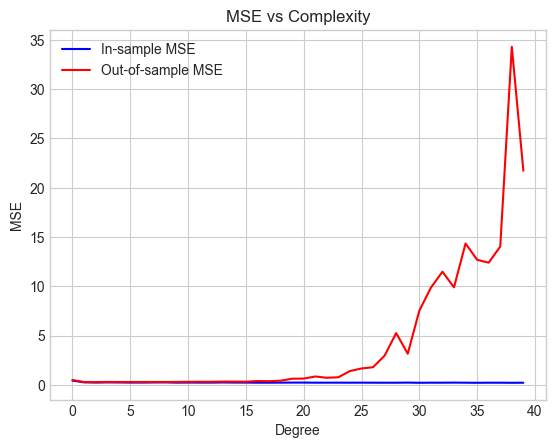

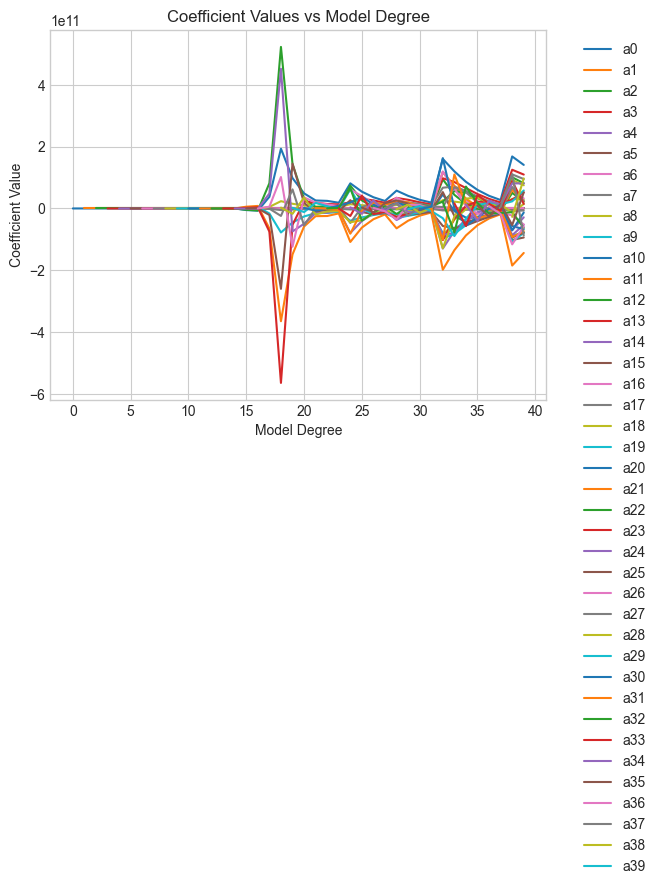

In [225]:
# Part 3: Illustrating the analysis
# Graph 3: in-sample bias^2 and variance
plt.figure(3)
plt.plot(degs, bias_sq, 'b-', label='In-sample Bias^2')
plt.plot(degs, variance, 'g-', label='In-sample Variance')
plt.xlabel('Degree')
plt.ylabel('Value')
plt.legend()
plt.title('In-sample Bias^2 and Variance vs Complexity')
plt.show()

# Graph 4: average in-sample and out-of-sample MSE
plt.figure(4)
plt.plot(degs, train_mse, 'b-', label='In-sample MSE')
plt.plot(degs, test_mse, 'r-', label='Out-of-sample MSE')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE vs Complexity')
plt.show()

# Graph 5: coefficients using fixed dataset
coefs_matrix = np.zeros((max_deg + 1, max_deg + 1))  # row: deg 0 to 39, col: a0 to a39
for deg in degs:
    model = models_to_plot[deg]
    coefs = model.named_steps['linearregression'].coef_
    coefs_matrix[deg, 0:deg+1] = coefs  # low to high: a0, a1, ...

plt.figure(5)
for k in range(max_deg + 1):
    plt.plot(degs[k:], coefs_matrix[k:, k], label=f'a{k}')
plt.xlabel('Model Degree')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Values vs Model Degree')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Graph 5 note: due to color restrictions, a few coefficients have similar colors. However, we can see how for smaller degree polynomials/ simpler cmodels the coeeficients do not have very high values, as the complexity of models increases or the degree of polynomials gets larger the coefficients also get larger this is why initially it is 0 for a lot of the coefficients. Clarifying the labels further: y = a0 + a1x, y = a0 + a1x + a2x^2, y = a0 + a1x + a2x^2 + a3x^3 ... till a39x^39

---
# Step 4: Analysing everything done so far: 


### Analysis of Bias-Variance Tradeoff

1. **In-sample MSE (bias) with complexity**:
   - The **in-sample MSE** is observed to **decrease** with complexity, while in the graphs above it seems stagnant or a straight line if we closely observe the begining there is a drop. I also plotted just the first 5 polynomials MSE and noticed a drop and it can also be clearly seen in the in-sample bias vs variance graph or graph 4. As the polynomial degree increases, the model becomes more flexible and can fit the training data (including the noise \(\epsilon\)) more closely. This results in a lower in-sample MSE, as the model captures more of the training data's variability, including both the true function \( 1 - \cos(x) + x \) and the noise.

2. **In-sample vs. out-of-sample MSE for less complex models**:
   - For less complex models (low polynomial degrees, e.g., 0, 1, 3), the **in-sample MSE** is observed to be **lower** than the **out-of-sample MSE**. This indicates **underfitting**, as the model is too simple to capture the underlying pattern of the true function \( 1 - \cos(x) + x \). The model fails to fit the training data well, and its performance is even worse on the test data, which includes different noise realizations, leading to higher out-of-sample MSE. This might be harder to see for degrees 0 - 18 but if we zoom in we will notice that the out ouf sample MSE is above the in-sample MSE. However, it is true that the difference between the two is smaller compared to the difference between polynomials of very high degree or more complex models.

3. **Out-of-sample vs. in-sample error for the most complex models**:
   - For the most complex models (high polynomial degrees, e.g., 39), the **out-of-sample error** is **significantly larger** than the in-sample error. This indicates high **variance** due to **overfitting**. The high-degree polynomials fit the training data (including the noise \(\epsilon\)) almost perfectly, resulting in a very low in-sample MSE. However, they generalize poorly to the test data, as they capture noise patterns specific to the training set, leading to a much higher out-of-sample MSE.

### Explanation
- **Bias^2 and Variance (Graph 3)**: As model complexity increases, bias^2 decreases because the model's expected predictions get closer to the true function values on the training points. However, variance increases significantly for high-degree polynomials, as the model becomes sensitive to the noise in different training sets.
- **MSE Comparison (Graph 4)**: The in-sample MSE approaches the irreducible error (approximately \(\sigma^2 = 0.25\) due to \(\epsilon \sim N(0, 0.5)\)) for high-degree models, while the out-of-sample MSE spikes due to overfitting, confirming high variance.
- **Overfitting vs. Underfitting**: Low-degree models underfit, failing to capture the complexity of \( 1 - \cos(x) + x \), while high-degree models overfit, capturing noise and leading to poor generalization.

This analysis aligns with the expected behavior of the bias-variance tradeoff as illustrated by the code's output, particularly in Graphs 3 and 4, which show the trends in bias^2, variance, and MSEs across model complexities.



In [226]:
print("Sanity check, all cells work :)")

Sanity check, all cells work :)
